In [3]:
import pandas as pd
import math
import statistics as stat
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv('train.csv')  
pd.set_option('precision', 2)  # format for floating-point values
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
passenger_count = len(titanic.Age)

good_ages = [Age for Age in titanic.Age if not math.isnan(Age)]
good_ages_count = len(good_ages)

mean_age = sum(good_ages)/good_ages_count

print(f'count of all  ages = {passenger_count}')
print(f'count of good ages = {good_ages_count}')
print(f' mean of good ages = {mean_age:.2f}')

count of all  ages = 891
count of good ages = 714
 mean of good ages = 29.70


In [6]:
titanic.describe()# descriptive stat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
print(f'stat.mean      = {stat.mean(good_ages):.2f}')
print(f'stat.median    = {stat.median(good_ages):.2f}')
print(f'stat.pvariance = {stat.pvariance(good_ages):.2f}')
print(f'stat.pstdev    = {stat.pstdev(good_ages):.2f}')

stat.mean      = 29.70
stat.median    = 28.00
stat.pvariance = 210.72
stat.pstdev    = 14.52


In [8]:
sorted_good_ages = sorted(good_ages)
print(f'len(sorted(good_ages)) = {len(sorted_good_ages)}')
min_age = sorted_good_ages[0]
max_age = sorted_good_ages[-1]

print(f'min of ages = {min_age:.2f}')
print(f'max of ages = {max_age:.2f}')

len(sorted(good_ages)) = 714
min of ages = 0.42
max of ages = 80.00


In [9]:
mid = good_ages_count//2

if good_ages_count%2 == 1:
    median_age = sorted_good_ages[mid+1]
else:
    median_age = (sorted_good_ages[mid] + sorted_good_ages[mid+1])/2
    
print(f'median of good ages = {median_age:.2f}')

median of good ages = 28.00


In [10]:
sum_of_squares = 0

for age in good_ages:
    sum_of_squares += (age - mean_age)**2
    
variance = sum_of_squares/good_ages_count
stdev    = math.sqrt(variance)

print(f'sum sqrs of ages = {sum_of_squares:.2f}')
print(f'variance of ages = {variance:.2f}')
print(f' std dev of ages = {stdev:.2f}')

sum sqrs of ages = 150456.64
variance of ages = 210.72
 std dev of ages = 14.52


[216, 184, 491]
Count of passengers in each class


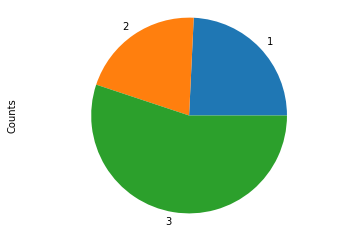

In [11]:
def status_in_class(klass, status):
   
    
    class_count  = 0
    status_count = 0
    
    for srv, kls in zip(titanic['Survived'], titanic['Pclass']):
        if kls == klass:  # the class that we want?
            class_count += 1
            
            if srv == status:  # survived or perished in that class?
                status_count += 1
                
    return (class_count, status_count)
count_1st, survived_1st = status_in_class(1, 1)
count_2nd, survived_2nd = status_in_class(2, 1)
count_3rd, survived_3rd = status_in_class(3, 1)

print([count_1st, count_2nd, count_3rd])
print('Count of passengers in each class')

df_count_pie = pd.DataFrame({'Pclass' : ['1', '2', '3'], 
                             'Counts' : [count_1st, count_2nd, count_3rd]})
df_count_pie.Counts.groupby(df_count_pie.Pclass).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

In [12]:
(titanic.Survived == 1).describe()

count       891
unique        2
top       False
freq        549
Name: Survived, dtype: object

Box chart of age ranges by class


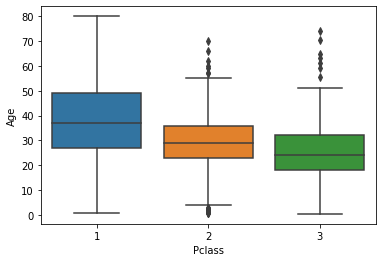

In [13]:
print('Box chart of age ranges by class')
boxplot = sns.boxplot(y='Age', x='Pclass', data=titanic)

In [14]:
titanic.describe()# descriptive stat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c651110>,
      dtype=object)

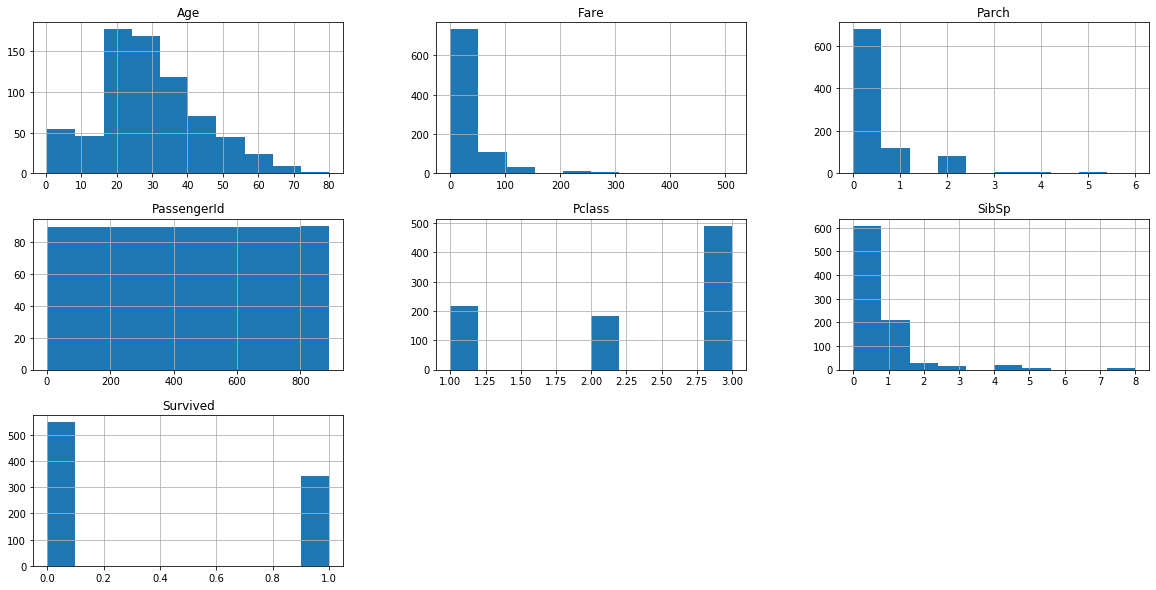

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
titanic.hist()  # passenger age only

In [16]:
def show_pie_chart(title, wedge_labels, wedge_values):
   
    print(title)
    
    df_count_pie = pd.DataFrame({'Class' : wedge_labels, 
                                 'Counts' : wedge_values})
    df_count_pie.Counts.groupby(df_count_pie.Class).sum().plot(kind='pie')
    plt.axis('equal')
    plt.show()

Count of passengers in each class


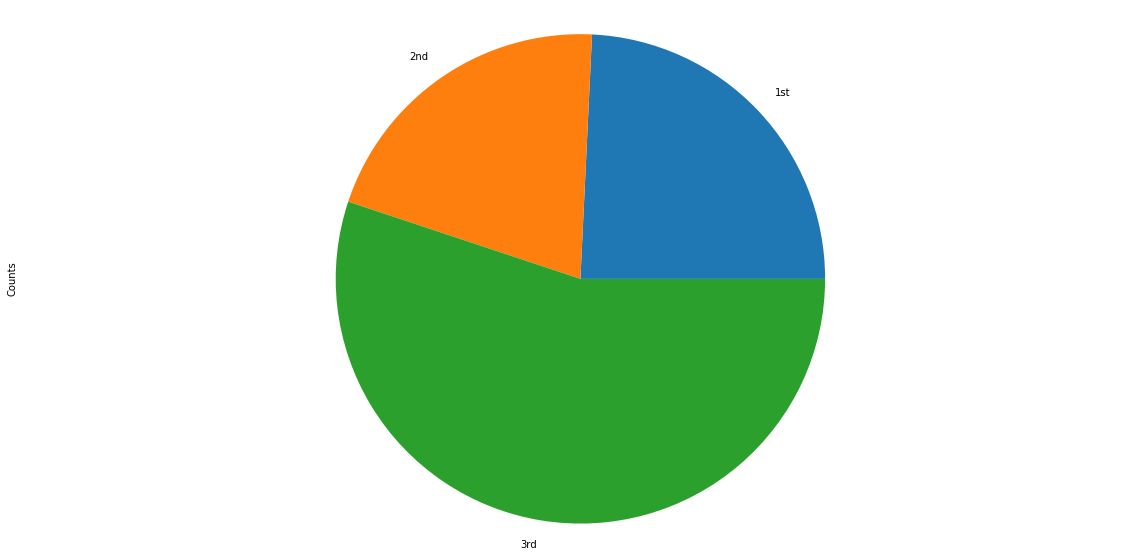

In [17]:
Class = ['1st', '2nd', '3rd']
Counts  = [count_1st, count_2nd, count_3rd]

show_pie_chart('Count of passengers in each class', Class, Counts)

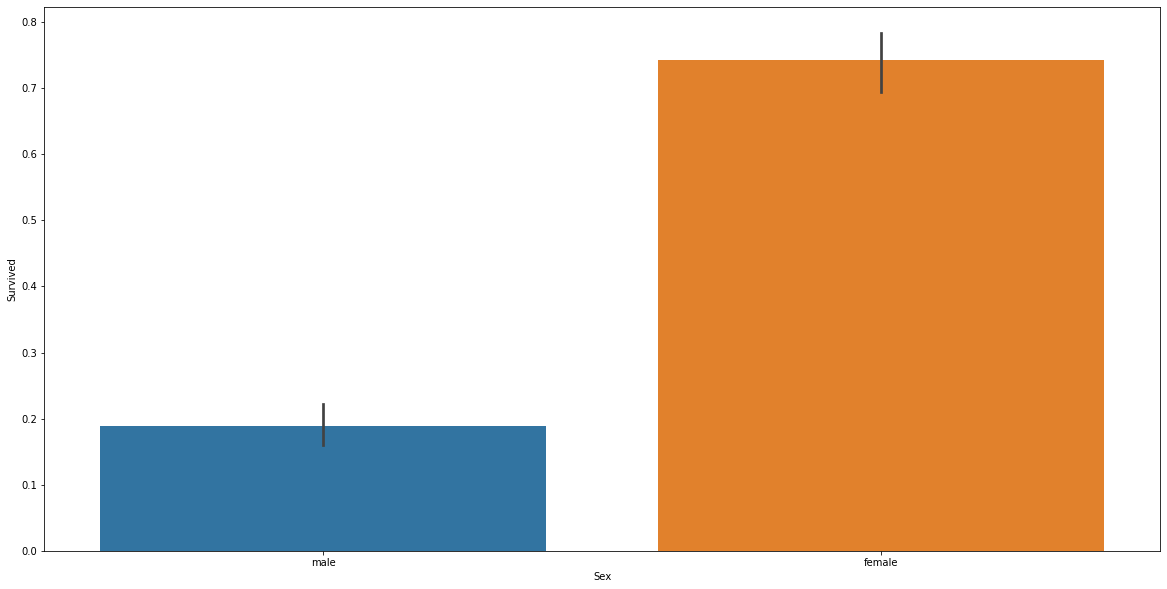

In [18]:
sns.barplot(x='Sex', y='Survived', data=titanic)

Text(0.5, 1.0, 'Female')

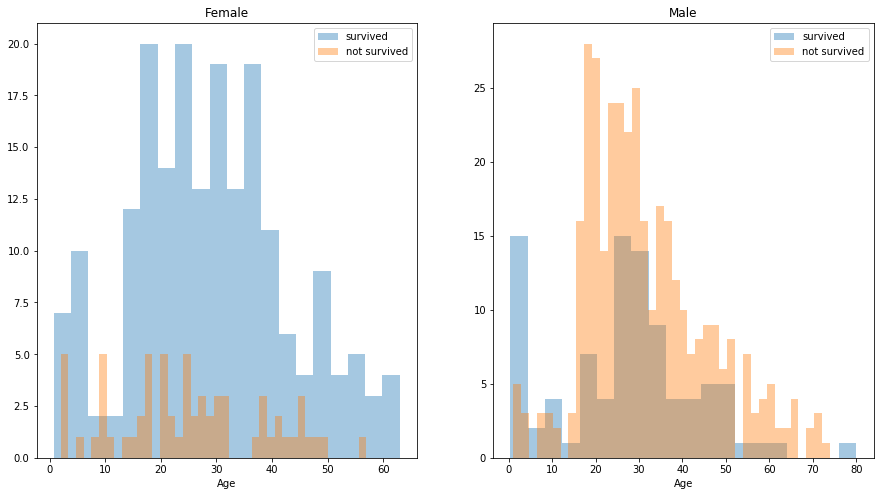

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 8))
woman = titanic[titanic['Sex'] == 'female']
man = titanic[titanic['Sex'] == 'male']
ax = sns.distplot(man[man['Survived'] == 1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(man[man['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')
ax = sns.distplot(woman[woman['Survived'] == 1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(woman[woman['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

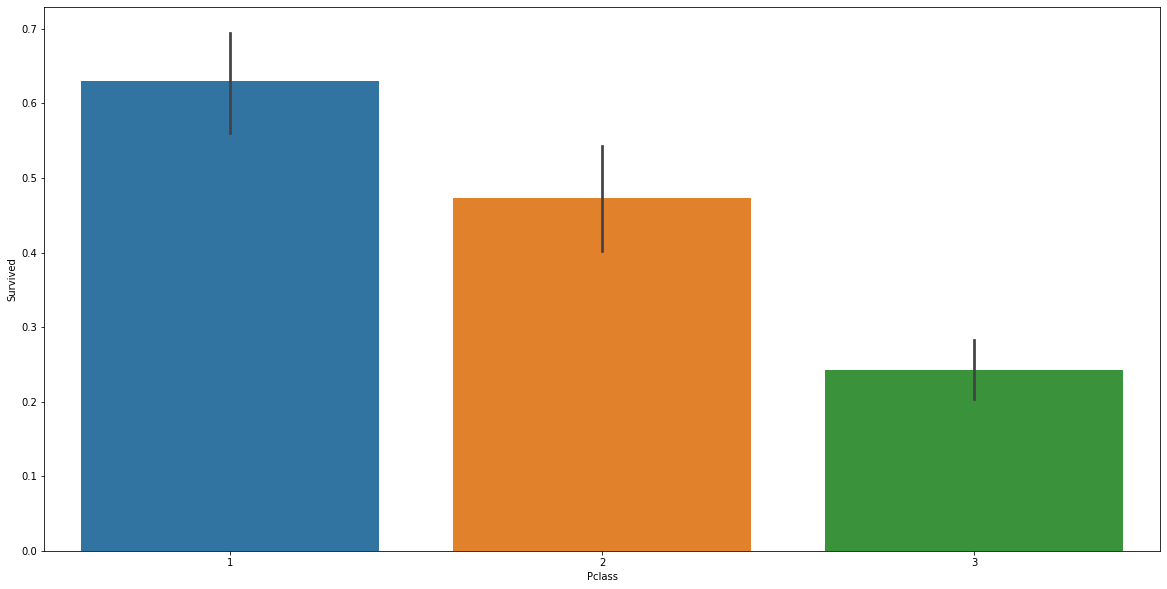

In [20]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

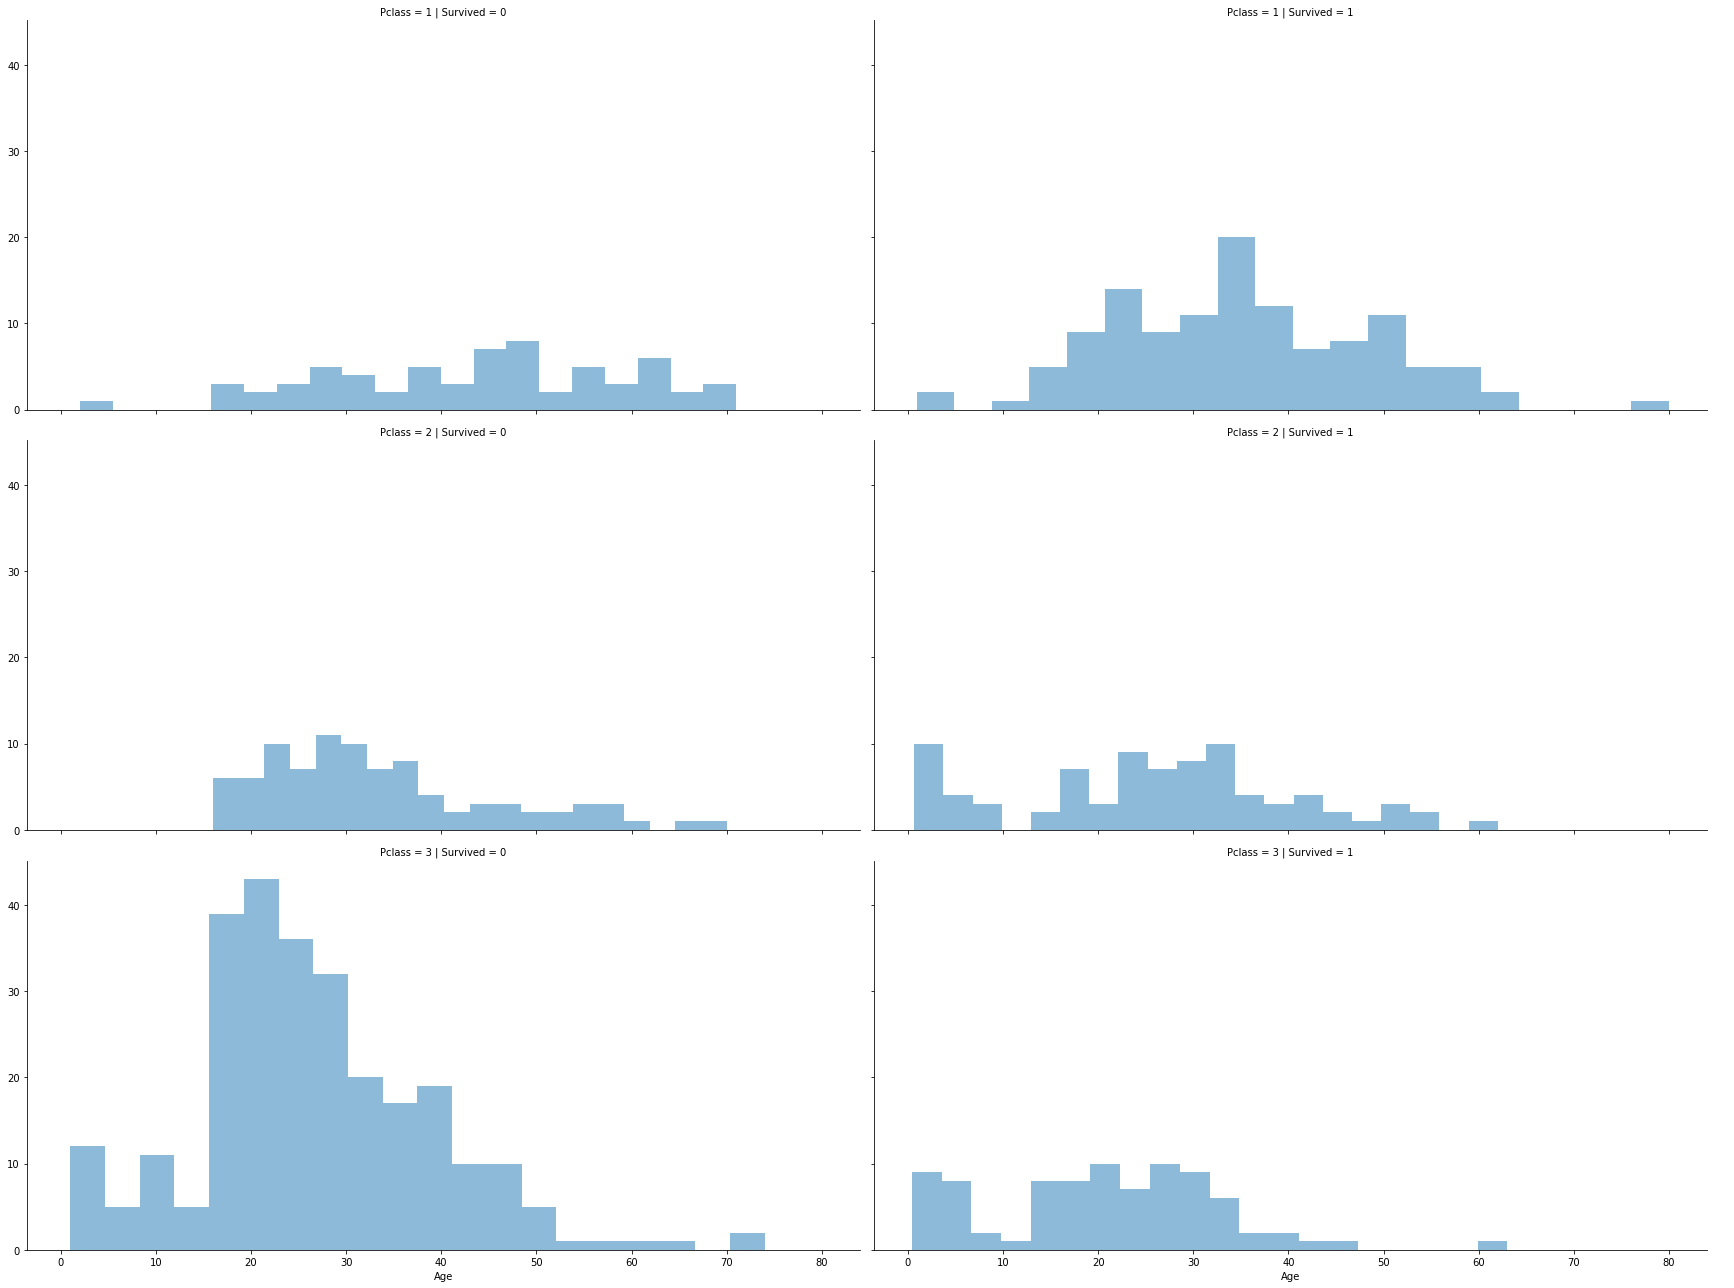

In [21]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=6, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [23]:
from random import seed
from random import random
from random import randrange, uniform
import csv
from statistics import mean, stdev
from math import exp

seed(1)

def read_csv_data(filename):
    with open(filename, mode='r') as file:
        reader = csv.reader(file, delimiter=',')
        df = []
        for row in reader:
            df.append(row)
    return df

# Searching the min and max values for each column:
def dataset_minmax(dataset):
    stats = []
    for column in zip(*dataset):
        stats.append([min(column), max(column)])
    return stats

# Create pipeline: Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row) - 1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Get k folds from the dataset for cross validation
def get_k_folds(data, num_folds):
    split_data = []
    duplicate_data = data[:]
    size = int(len(data) / num_folds)
    for i in range(num_folds):
        fold = []
        j = 0
        for j in range(size):
            index = randrange(len(duplicate_data))
            fold.append(duplicate_data.pop(index))
            j = len(fold)
        split_data.append(fold)
    return split_data


# Calculate the accuracy of the predicted values
def calc_accuracy(expected, predicted):
    correct = 0
    size = len(expected)
    for i in range(size):
        if predicted[i] == expected[i]:
            correct += 1
    return correct / float(size) * 100.0


# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]
    return activation


# Transfer neuron activation based on relu
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))


# Propagate input to the output in the network
def forward_propagation(network, row):
    initial_inputs = row
    for layer in network:
        transferred_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], initial_inputs)
            neuron['output'] = transfer(activation)
            transferred_inputs.append(neuron['output'])
        initial_inputs = transferred_inputs
    return initial_inputs


# Neuron output derivate calculation
def neuron_derivative_transfer(output):
    return output * (1.0 - output)


# Calculate error in backward propagation
def backward_propagation_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        if i == (len(network) - 1):
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        else:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        for k in range(len(layer)):
            neuron = layer[k]
            neuron['delta'] = errors[k] * neuron_derivative_transfer(neuron['output'])


# Update network weights with error
def add_error_in_weights(network, row, learning_rate):
    for i in range(len(network)):
        for neuron in network[i]:
            inputs = []
            if i == 0:
                inputs = row[:-1]
            else:
                for previous in network[i - 1]:
                    inputs.append(previous['output'])
            for j in range(len(inputs)):
                neuron['weights'][j] += learning_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += learning_rate * neuron['delta']


# Train a network for a fixed number of epochs
def train(network, train_data, output_size, learning_rate, num_epoch):
    for epoch in range(num_epoch):
        error_sum = 0.0
        for row in train_data:
            outputs = forward_propagation(network, row)
            expected = [0 for i in range(output_size)]
            expected[row[-1]] = 1
            error_sum += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagation_error(network, expected)
            add_error_in_weights(network, row, learning_rate)
        print('epoch=%d || learning_rate=%.3f || error=%.3f' % (epoch, learning_rate, error_sum))


# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagation(network, row)
    return outputs.index(max(outputs))


# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(training_data, test_data, learning_rate, epochs, hidden_layers):
    inputs_size = len(training_data[0]) - 1
    outputs_size = len(set([row[-1] for row in training_data]))
    network = create_network(inputs_size, hidden_layers, outputs_size)
    train(network, training_data, outputs_size, learning_rate, epochs)
    predictions = []
    for row in test_data:
        prediction = predict(network, row)
        predictions.append(prediction)
    return predictions


# create the neural network
def create_network(num_inputs, num_hidden, num_outputs):
    network = []
    hidden_layer = []
    for i in range(num_hidden):
        weights = {'weights': []}
        for i in range(num_inputs + 1):
            weights['weights'].append(random())
        hidden_layer.append(weights)
    network.append(hidden_layer)
    output_layer = []
    for i in range(num_outputs):
        weights = {'weights': []}
        for i in range(num_hidden + 1):
            weights['weights'].append(random())
        output_layer.append(weights)
    network.append(output_layer)
    return network


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(training_data, algorithm, folds_size, learning_rate, epochs, hidden_layers):
    folds = get_k_folds(training_data, folds_size)
    model_scores = []
    for fold in folds:
        training_input = folds[:]
        training_input.remove(fold)
        training_input = sum(training_input, [])
        test_input = []
        for row in fold:
            duplicate_row = row[:]
            test_input.append(duplicate_row)
            duplicate_row[-1] = None
        predicted = algorithm(training_input, test_input, learning_rate, epochs, hidden_layers)
        expected = [row[-1] for row in fold]
        accuracy = calc_accuracy(expected, predicted)
        model_scores.append(accuracy)
    return model_scores

def age_group(age):
    if age <= 10:
        return 1
    elif 10 < age <= 20:
        return 2
    elif 20 < age <= 30:
        return 3
    elif 30 < age <= 40:
        return 4
    elif 40 < age <= 50:
        return 5
    elif 50 < age <= 60:
        return 6
    elif 60 < age <= 70:
        return 7
    elif 70 < age <= 80:
        return 8
    else:
        return 9


#### Training ####
training_data_filename = 'train.csv'
dataset = read_csv_data(training_data_filename)
columns = dataset[:1]

training_data = dataset[1:]
embarked_code = {'C': 1, 'Q': 2, 'S': 3}
sex_code = {'male': 1, 'female': 2}
mean_age = 0
std_age = 0
training_converted_data = []
ages = []
for row in training_data:
    # convert everything to int
    pClass = int(row[2])
    sex = 1
    if row[4] == 'male' or row[4] == 'female':
        sex = sex_code[row[4]]
    age = ''
    if row[5] != '' or row[5] is None:
        age_data = float(row[5])
        ages.append(age_data)
        age = age_group(age_data)
    sibsp = int(row[6])
    parch = int(row[7])
    embarked = 1
    if row[11] != '' or row[11] is None:
        embarked = embarked_code[row[11]]
    final_row = [pClass, sex, age, sibsp, parch, embarked, int(row[1])]
    training_converted_data.append(final_row)

training_data = training_converted_data

mean_age = mean(ages)
std_age = stdev(ages)

training_rows = []
for row in training_data:
    row[2] = age_group(uniform(mean_age + std_age, mean_age - std_age))
    training_rows.append(row[:])


minmax = dataset_minmax(training_rows)
normalize_dataset(training_rows, minmax)

folds = 5
learning_rate = 0.1
epochs = 500
hidden_layers = 6
scores = evaluate_algorithm(training_rows, back_propagation, folds, learning_rate, epochs, hidden_layers)

print(scores)


epoch=0 || learning_rate=0.100 || error=376.630
epoch=1 || learning_rate=0.100 || error=341.938
epoch=2 || learning_rate=0.100 || error=314.687
epoch=3 || learning_rate=0.100 || error=265.705
epoch=4 || learning_rate=0.100 || error=232.119
epoch=5 || learning_rate=0.100 || error=219.566
epoch=6 || learning_rate=0.100 || error=214.779
epoch=7 || learning_rate=0.100 || error=212.354
epoch=8 || learning_rate=0.100 || error=210.756
epoch=9 || learning_rate=0.100 || error=209.509
epoch=10 || learning_rate=0.100 || error=208.451
epoch=11 || learning_rate=0.100 || error=207.520
epoch=12 || learning_rate=0.100 || error=206.690
epoch=13 || learning_rate=0.100 || error=205.948
epoch=14 || learning_rate=0.100 || error=205.284
epoch=15 || learning_rate=0.100 || error=204.690
epoch=16 || learning_rate=0.100 || error=204.158
epoch=17 || learning_rate=0.100 || error=203.682
epoch=18 || learning_rate=0.100 || error=203.255
epoch=19 || learning_rate=0.100 || error=202.870
epoch=20 || learning_rate=0.10

In [24]:
from random import seed
from random import random
from random import randrange, uniform
import csv
from statistics import mean, stdev
from math import exp

seed(1)

def read_csv_data(filename):
    with open(filename, mode='r') as file:
        reader = csv.reader(file, delimiter=',')
        df = []
        for row in reader:
            df.append(row)
    return df

# Searching the min and max values for each column:
def dataset_minmax(dataset):
    stats = []
    for column in zip(*dataset):
        stats.append([min(column), max(column)])
    return stats

# Create pipeline: Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row) - 1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Get k folds from the dataset for cross validation
def get_k_folds(data, num_folds):
    split_data = []
    duplicate_data = data[:]
    size = int(len(data) / num_folds)
    for i in range(num_folds):
        fold = []
        j = 0
        for j in range(size):
            index = randrange(len(duplicate_data))
            fold.append(duplicate_data.pop(index))
            j = len(fold)
        split_data.append(fold)
    return split_data


# Calculate the accuracy of the predicted values
def calc_accuracy(expected, predicted):
    correct = 0
    size = len(expected)
    for i in range(size):
        if predicted[i] == expected[i]:
            correct += 1
    return correct / float(size) * 100.0


# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]
    return activation


# Transfer neuron activation based on relu
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))


# Propagate input to the output in the network
def forward_propagation(network, row):
    initial_inputs = row
    for layer in network:
        transferred_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], initial_inputs)
            neuron['output'] = transfer(activation)
            transferred_inputs.append(neuron['output'])
        initial_inputs = transferred_inputs
    return initial_inputs


# Neuron output derivate calculation
def neuron_derivative_transfer(output):
    return output * (1.0 - output)


# Calculate error in backward propagation
def backward_propagation_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        if i == (len(network) - 1):
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        else:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        for k in range(len(layer)):
            neuron = layer[k]
            neuron['delta'] = errors[k] * neuron_derivative_transfer(neuron['output'])


# Update network weights with error
def add_error_in_weights(network, row, learning_rate):
    for i in range(len(network)):
        for neuron in network[i]:
            inputs = []
            if i == 0:
                inputs = row[:-1]
            else:
                for previous in network[i - 1]:
                    inputs.append(previous['output'])
            for j in range(len(inputs)):
                neuron['weights'][j] += learning_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += learning_rate * neuron['delta']


# Train a network for a fixed number of epochs
def train(network, train_data, output_size, learning_rate, num_epoch):
    for epoch in range(num_epoch):
        error_sum = 0.0
        for row in train_data:
            outputs = forward_propagation(network, row)
            expected = [0 for i in range(output_size)]
            expected[row[-1]] = 1
            error_sum += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagation_error(network, expected)
            add_error_in_weights(network, row, learning_rate)
        print('epoch=%d || learning_rate=%.3f || error=%.3f' % (epoch, learning_rate, error_sum))


# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagation(network, row)
    return outputs.index(max(outputs))


# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(training_data, test_data, learning_rate, epochs, hidden_layers):
    inputs_size = len(training_data[0]) - 1
    outputs_size = len(set([row[-1] for row in training_data]))
    network = create_network(inputs_size, hidden_layers, outputs_size)
    train(network, training_data, outputs_size, learning_rate, epochs)
    predictions = []
    for row in test_data:
        prediction = predict(network, row)
        predictions.append(prediction)
    return predictions, network


# create the neural network
def create_network(num_inputs, num_hidden, num_outputs):
    network = []
    hidden_layer = []
    for i in range(num_hidden):
        weights = {'weights': []}
        for i in range(num_inputs + 1):
            weights['weights'].append(random())
        hidden_layer.append(weights)
    network.append(hidden_layer)
    output_layer = []
    for i in range(num_outputs):
        weights = {'weights': []}
        for i in range(num_hidden + 1):
            weights['weights'].append(random())
        output_layer.append(weights)
    network.append(output_layer)
    return network


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(training_data, algorithm, folds_size, learning_rate, epochs, hidden_layers):
    folds = get_k_folds(training_data, folds_size)
    model_scores = []
    networks = []
    for fold in folds:
        training_input = folds[:]
        training_input.remove(fold)
        training_input = sum(training_input, [])
        test_input = []
        for row in fold:
            duplicate_row = row[:]
            test_input.append(duplicate_row)
            duplicate_row[-1] = None
        predicted, network = algorithm(training_input, test_input, learning_rate, epochs, hidden_layers)
        expected = [row[-1] for row in fold]
        accuracy = calc_accuracy(expected, predicted)
        model_scores.append(accuracy)
        networks.append(network)
    return model_scores, networks

def age_group(age):
    if age <= 10:
        return 1
    elif 10 < age <= 20:
        return 2
    elif 20 < age <= 30:
        return 3
    elif 30 < age <= 40:
        return 4
    elif 40 < age <= 50:
        return 5
    elif 50 < age <= 60:
        return 6
    elif 60 < age <= 70:
        return 7
    elif 70 < age <= 80:
        return 8
    else:
        return 9


#### Training ####
training_data_filename = '/kaggle/input/titanic/train.csv'
dataset = read_csv_data(training_data_filename)
columns = dataset[:1]

training_data = dataset[1:]
embarked_code = {'C': 1, 'Q': 2, 'S': 3}
sex_code = {'male': 1, 'female': 2}
mean_age = 0
std_age = 0
training_converted_data = []
ages = []
for row in training_data:
    # convert everything to int
    pClass = int(row[2])
    sex = 1
    if row[4] == 'male' or row[4] == 'female':
        sex = sex_code[row[4]]
    age = ''
    if row[5] != '' or row[5] is None:
        age_data = float(row[5])
        ages.append(age_data)
        age = age_group(age_data)
    sibsp = int(row[6])
    parch = int(row[7])
    embarked = 1
    if row[11] != '' or row[11] is None:
        embarked = embarked_code[row[11]]
    final_row = [pClass, sex, age, sibsp, parch, embarked, int(row[1])]
    training_converted_data.append(final_row)

training_data = training_converted_data

mean_age = mean(ages)
std_age = stdev(ages)

training_rows = []
for row in training_data:
    row[2] = age_group(uniform(mean_age + std_age, mean_age - std_age))
    training_rows.append(row[:])


minmax = dataset_minmax(training_rows)
normalize_dataset(training_rows, minmax)

folds = 5
learning_rate = 0.1
epochs = 500
hidden_layers = 6
scores, networks = evaluate_algorithm(training_rows, back_propagation, folds, learning_rate, epochs, hidden_layers)

print(scores)

maxIndex = 0
maxScore = scores[0]
for i in range(len(scores)):
    if maxScore <= scores[i]:
        maxIndex = i
        maxScore = scores[i]

network = networks[maxIndex]

#### Testing ####
test_data_filename = '/kaggle/input/titanic/test.csv'
test_dataset = read_csv_data(test_data_filename)
testing_data = test_dataset[1:]
test_converted_data = []
mean_age = 0
std_age = 0
ages = []
for row in testing_data:
    # convert everything to int
    pClass = int(row[1])
    sex = 1
    if row[3] == 'male' or row[3] == 'female':
        sex = sex_code[row[3]]
    age = ''
    if row[4] != '' or row[4] is None:
        age_data = float(row[4])
        ages.append(age_data)
        age = age_group(age_data)
    sibsp = int(row[5])
    parch = int(row[6])
    embarked = 1
    if row[10] != '' or row[10] is None:
        embarked = embarked_code[row[10]]
    final_row = [pClass, sex, age, sibsp, parch, embarked]
    test_converted_data.append(final_row)


mean_age = mean(ages)
std_age = stdev(ages)
testing_rows = []
for row in test_converted_data:
    row[2] = age_group(uniform(mean_age + std_age, mean_age - std_age))
    testing_rows.append(row[:])


minmax = dataset_minmax(testing_rows)
normalize_dataset(testing_rows, minmax)

test_prediction = [['PassengerId', 'Survived']]
for i in range(len(testing_rows)):
    prediction = predict(network, testing_rows[i])
    test_prediction.append([testing_data[i][0], prediction])


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

In [ ]:
file = open('./submission.csv', 'w+', newline='')

with file:
    write = csv.writer(file)
    write.writerows(test_prediction)